In [54]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Data/dreaddit-train.csv')
df_test = pd.read_csv('Data/dreaddit-test.csv')

In [3]:
df.head()

subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555             0    2.667798  ...   
4         0.8        1539809005            24    7.554238  ...   

   lex_dal_min_pleasantness  lex_dal_min_activation  lex_dal_min_imagery  \
0                     1.000                  1.1250                  1.0   
1                     1.125                  1.0000                  1.0   
2                     1.000                  1.1429                  1.0   
3                     1.000                  1.1250                  1.0   
4                     1.000                  1.1250                  1.0   

   lex_dal_avg_activation  lex_dal_avg_imagery  lex_dal_avg_pleasantness  \
0                 1.77000              1.52211                   1.89556   
1                 1.69586              1.62045                   1.88919   
2                 1.83088              1.58108                   1.85828   
3                 1.75356              1.52114                   1.98848   
4                 1.77644              1.64872                   1.81456   

   social_upvote_ratio  social_num_comments  syntax_fk_grade  sentiment  
0                 0.86                    1         3.253573  -0.002742  
1                 0.65                    2         8.828316   0.292857  
2                 0.67                    0         7.841667   0.011894  
3                 0.50                    5         4.104027   0.141671  
4                 1.00                    1         7.910952  -0.204167  

[5 rows x 116 columns]

In [4]:
text_list = []
for each_post in df['text']:
    text_list.append(each_post)

In [5]:
x_train = df['text']

In [6]:
count_vector = CountVectorizer(lowercase=True, analyzer='word', token_pattern=r'\w{1,}')
count_vector.fit(df['text'])

X_train = count_vector.transform(x_train)

In [7]:
X_train = X_train.toarray()
y_train = df['label']

In [8]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [9]:
x_val = df_test['text']
x_valid_count = count_vector.transform(x_val)

In [10]:
x_valid_count = x_valid_count.toarray()

In [11]:
predictions = clf.predict(x_valid_count)

In [12]:
clf.score(X_train, y_train)

0.905214940098661

In [13]:
y_test = df_test['label']

In [14]:
clf.score(x_valid_count, y_test)

0.73006993006993

In [55]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67       346
           1       0.69      0.88      0.77       369

    accuracy                           0.73       715
   macro avg       0.75      0.73      0.72       715
weighted avg       0.75      0.73      0.72       715



In [57]:
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

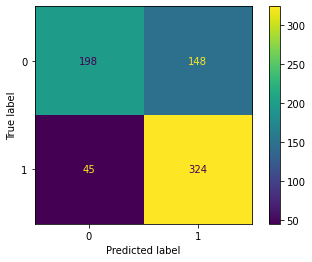

In [58]:
disp.plot()
plt.show()

In [59]:
indices = [i for i in range(len(y_test)) if y_test[i] != predictions[i]]

In [61]:
wrong_predictions = df_test.iloc[indices,:]

In [82]:
#wrong_predictions['text'][195]
wrong_predictions.head(10)

id         subreddit post_id sentence_range  \
4    1965     relationships  7r1e85       [23, 28]   
15   1824     relationships  7rc73v       [20, 25]   
18    895           anxiety  6f4swf       [10, 15]   
19   1361           anxiety  8dllx7       [25, 30]   
26   1466          homeless  9ltr4j         [3, 8]   
31  32340  domesticviolence  75lf1x       (10, 15)   
36   1234     relationships  7omiu8       [35, 40]   
40   1223          homeless  8rmj3w         [0, 5]   
47  42340     relationships  7sazi6         (0, 5)   
50  49500     relationships  7pe2io       (10, 15)   

                                                 text  label  confidence  \
4   I haven’t said anything to him yet because I’m...      0         0.8   
15  Despite being younger than him, I have had mor...      0         0.8   
18  If I go to an interview for example, I'll know...      0         0.6   
19  Like sleep would never be a simple thing for m...      0         0.0   
26  I could be homeless soon, and that's not like ...      0         0.8   
31  I had poked fun at him for looking at /r/henta...      0         1.0   
36  His reason was that he would rather save money...      0         0.8   
40  So, I've been homeless since about the first, ...      0         1.0   
47  I'll try to keep this short. I've never been a...      0         0.8   
50  None of the issues we discuss get addressed. 6...      0         0.6   

    social_timestamp  social_karma  syntax_ari  ...  lex_dal_min_pleasantness  \
4       1.516200e+09           138    4.649418  ...                    1.1250   
15      1.516304e+09             5    1.762857  ...                    1.3333   
18      1.496540e+09             3    5.697385  ...                    1.0000   
19      1.524207e+09             3    1.634064  ...                    1.1250   
26      1.538806e+09             6    3.591404  ...                    1.0000   
31      1.507682e+09             4    5.578349  ...                    1.0000   
36      1.515278e+09             9    3.213494  ...                    1.0000   
40      1.529186e+09             2    3.340000  ...                    1.2000   
47      1.516672e+09             8    2.721667  ...                    1.1250   
50      1.515570e+09             4    3.346000  ...                    1.0000   

    lex_dal_min_activation  lex_dal_min_imagery  lex_dal_avg_activation  \
4                   1.1429                  1.0                 1.75642   
15                  1.0000                  1.0                 1.71926   
18                  1.0000                  1.0                 1.70351   
19                  1.3333                  1.0                 1.77426   
26                  1.0000                  1.0                 1.67023   
31                  1.0000                  1.0                 1.62476   
36                  1.0000                  1.0                 1.77389   
40                  1.1429                  1.0                 1.67694   
47                  1.2222                  1.0                 1.71069   
50                  1.1250                  1.0                 1.73322   

    lex_dal_avg_imagery  lex_dal_avg_pleasantness  social_upvote_ratio  \
4               1.43582                   1.91725                 0.84   
15              1.53784                   2.00065                 0.78   
18              1.40571                   1.87888                 0.81   
19              1.49615                   1.99557                 1.00   
26              1.46747                   1.91456                 0.76   
31              1.42955                   1.81819                 0.83   
36              1.62410                   1.97276                 0.74   
40              1.50541                   1.94570                 1.00   
47              1.42278                   1.89592                 0.90   
50              1.55294                   1.86978                 1.00   

    social_num_comments  syntax_fk_grade  

In [ ]:
wrong_predictions['confidence'].value_counts()

In [98]:
#df_test.head(20)
df_test['text'][7]

"More specifically, for example, I live with roommates and I can't remember the last time it has been quiet in the apartment. There's never a moment where it is completely silent and I know it's anxiety and sensory overload, but gosh does it make me angry. My roommates talk CONSTANTLY and they keep me from being able to sleep because all I can concentrate on is their voices. Another example, in one of my classes today, my professor talked non-stop and she's one of those extremely hyper, fast talking, off topic teachers who go off on tangents about things that aren't related to the lesson at all. It was so hard to stay in that class without storming out because I couldn't handle listening to her loud voice any longer."

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(random_state=0, C=100, max_iter=3000)

In [35]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=3000, random_state=0)

In [36]:
lr.score(X_train, y_train)

0.9985905567300916

In [37]:
y_pred = lr.predict(x_valid_count)

In [38]:
lr.score(x_valid_count, y_test)

0.7202797202797203

In [49]:
from sklearn import svm

In [52]:
svm = svm.SVC()

In [44]:
svm.fit(X_train, y_train)

SVC()

In [45]:
svm.score(X_train, y_train)

0.8928823114869626

In [46]:
svm_y_pred = svm.predict(x_valid_count)

In [47]:
svm.score(x_valid_count, y_test)

0.6965034965034965

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [87]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
xgb.score(X_train, y_train)

0.9887244538407329

In [89]:
pred = xgb.predict(x_valid_count)

In [90]:
xgb.score(x_valid_count, y_test)

0.7062937062937062